In [1]:
from torchvision import transforms
from AHCRDataset import AHCRDataset
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
from BaselineCNN import BaselineCNN
from Trainer import Trainer
import torch.nn as nn
from Paper1 import CNN14
from importlib import reload
from Paper2 import CustomCNN
from Paper3 import ArabicCharCNN
import torchvision.models as models

In [2]:

train_images_path = './Data/csvTrainImages 13440x1024.csv'
train_labels_path = './Data/csvTrainLabel 13440x1.csv'

test_images_path = './Data/csvTestImages 3360x1024.csv'
test_labels_path = './Data/csvTestLabel 3360x1.csv'

transform = transforms.Compose([
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
])


train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
test_dataset = AHCRDataset(test_images_path, test_labels_path, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


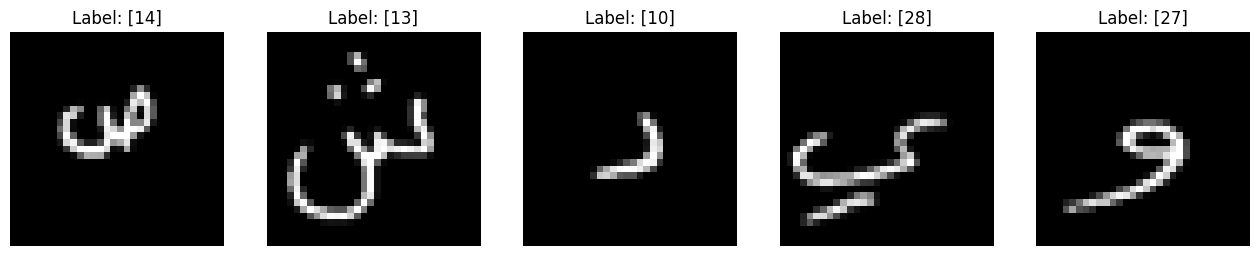

In [3]:
num_images = 5
img_size = (32, 32)  
fig, axes = plt.subplots(1, num_images, figsize=(16, 10))

for i in range(num_images):
    random_index = random.randrange(0, len(train_dataset))
    image, label = train_dataset[random_index]
    img = image.squeeze()

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Label: {label + 1}')
    axes[i].axis('off')

plt.show()


In [4]:
results_df = pd.DataFrame(columns=["Model", "Status", "Accuracy", "Precision", "Recall", "F1"])

In [6]:
param_grid = {
    'lr': [0.001, 0.0005],
    'weight_decay': [1e-4, 1e-5, 0],
    'val_ratio': [0.2]
}

Trainer.hyperparameter_tuning(BaselineCNN, train_loader, test_loader, param_grid, num_epochs=15)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.31149050540157724, Validation Accuracy: 90.92261904761905%
Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.3431175991538025, Validation Accuracy: 90.17857142857143%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.32177581425224033, Validation Accuracy: 90.84821428571429%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.31219922112567083, Validation Accuracy: 90.4389880952381%
Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.28457305881948697, Validation Accuracy: 90.47619047619048%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.2609406947380021, Validation Accuracy: 91.88988095238095%
Best Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Best Validation Loss: 0.2609406947380021


(BaselineCNN(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (dropout): Dropout(p=0.5, inplace=False)
   (fc1): Linear(in_features=4096, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=28, bias=True)
 ),
 {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2})

In [5]:
model = BaselineCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=20)

cuda
Epoch 1/20, Train Loss: 3.0241, Train Acc: 50.92%, Test Loss: 1.8178, Test Acc: 49.49%, 
Epoch 2/20, Train Loss: 1.8903, Train Acc: 71.18%, Test Loss: 1.0989, Test Acc: 68.54%, 
Epoch 3/20, Train Loss: 1.4510, Train Acc: 80.61%, Test Loss: 0.7813, Test Acc: 77.71%, 
Epoch 4/20, Train Loss: 1.1947, Train Acc: 85.79%, Test Loss: 0.6026, Test Acc: 82.14%, 
Epoch 5/20, Train Loss: 1.0256, Train Acc: 89.03%, Test Loss: 0.5198, Test Acc: 84.23%, 
Epoch 6/20, Train Loss: 0.8821, Train Acc: 90.39%, Test Loss: 0.4439, Test Acc: 85.30%, 
Epoch 7/20, Train Loss: 0.7788, Train Acc: 92.66%, Test Loss: 0.3927, Test Acc: 87.83%, 
Epoch 8/20, Train Loss: 0.6759, Train Acc: 93.81%, Test Loss: 0.3657, Test Acc: 88.39%, 
Epoch 9/20, Train Loss: 0.6217, Train Acc: 94.42%, Test Loss: 0.3645, Test Acc: 87.68%, 
Epoch 10/20, Train Loss: 0.5758, Train Acc: 95.75%, Test Loss: 0.3392, Test Acc: 89.17%, 
Epoch 11/20, Train Loss: 0.5318, Train Acc: 96.13%, Test Loss: 0.3237, Test Acc: 89.35%, 
Epoch 12/20, T

In [6]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "BaselineCNN"
status = "No Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

/tmp/ipykernel_51119/1297765022.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])],)


In [7]:
model_save_path = model_name +  status + ".pth" # Choose your path and file name
torch.save(model.state_dict(), model_save_path)


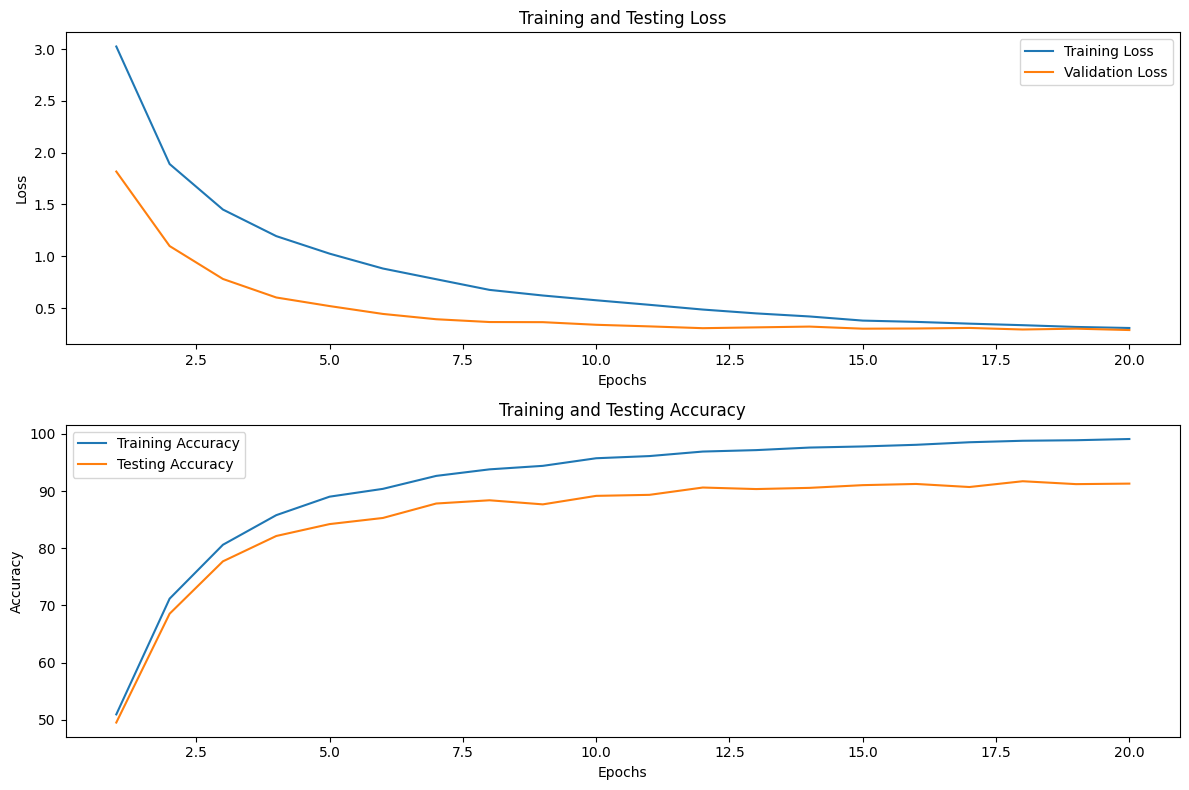

In [8]:
Trainer.plot_learning_curves(trainer)

## Paper 1

In [11]:
%%script false
%%time
Trainer.hyperparameter_tuning(CNN14, train_loader, test_loader, param_grid, num_epochs=20)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.1994737831742636, Validation Accuracy: 96.24255952380952%
Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.21279865161826214, Validation Accuracy: 95.05208333333333%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.2689165928778017, Validation Accuracy: 94.94047619047619%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.1660783613943273, Validation Accuracy: 96.01934523809524%
Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.14627628682536029, Validation Accuracy: 96.24255952380952%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.17106994942185424, Validation Accuracy: 95.79613095238095%
Best Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Best Validation Loss: 0.14627628682536029
CPU times: use

(CNN14(
   (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=2048, out_features=4096, bias=True)
   (fc2): Linear(in_features=4096, out_features=28, bias=True)
   (dropout): Dropout(p=0.5, inplace=False)
 ),
 {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2})

In [9]:
model = CNN14()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=20)

cuda
Epoch 1/20, Train Loss: 2.5244, Train Acc: 54.36%, Test Loss: 1.3076, Test Acc: 54.64%, 
Epoch 2/20, Train Loss: 0.8865, Train Acc: 82.25%, Test Loss: 0.5940, Test Acc: 80.77%, 
Epoch 3/20, Train Loss: 0.4536, Train Acc: 88.30%, Test Loss: 0.4316, Test Acc: 86.64%, 
Epoch 4/20, Train Loss: 0.2656, Train Acc: 94.43%, Test Loss: 0.2829, Test Acc: 92.29%, 
Epoch 5/20, Train Loss: 0.1817, Train Acc: 96.72%, Test Loss: 0.2289, Test Acc: 93.51%, 
Epoch 6/20, Train Loss: 0.1409, Train Acc: 97.87%, Test Loss: 0.2084, Test Acc: 94.32%, 
Epoch 7/20, Train Loss: 0.0933, Train Acc: 96.58%, Test Loss: 0.2855, Test Acc: 93.18%, 
Epoch 8/20, Train Loss: 0.0973, Train Acc: 98.62%, Test Loss: 0.2012, Test Acc: 95.21%, 
Epoch 9/20, Train Loss: 0.0703, Train Acc: 98.97%, Test Loss: 0.1891, Test Acc: 95.68%, 
Epoch 10/20, Train Loss: 0.0618, Train Acc: 98.38%, Test Loss: 0.2036, Test Acc: 94.73%, 
Epoch 11/20, Train Loss: 0.0444, Train Acc: 99.31%, Test Loss: 0.1897, Test Acc: 96.04%, 
Epoch 12/20, T

In [10]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "CNN14"
status = "No Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [11]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

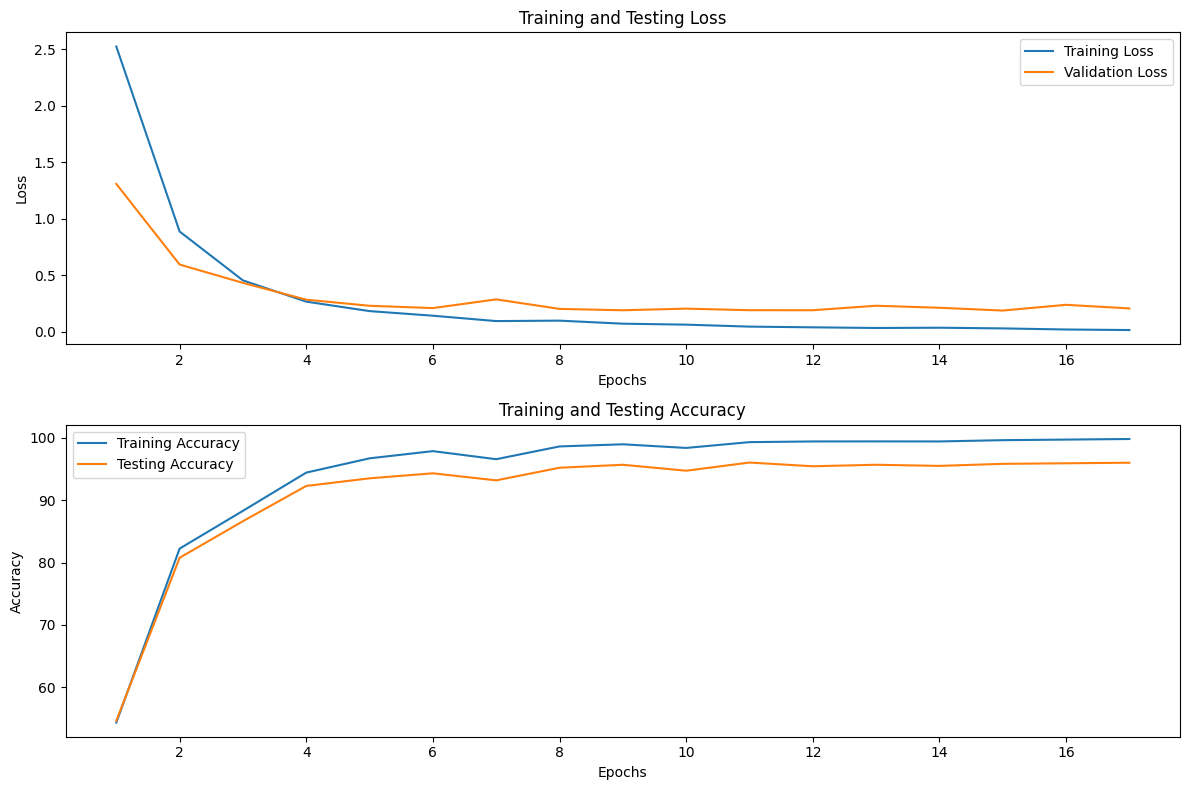

In [12]:
Trainer.plot_learning_curves(trainer)

## Paper 2

In [12]:
%%script false
Trainer.hyperparameter_tuning(CustomCNN, train_loader, test_loader, param_grid, num_epochs=20)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.22352105693980343, Validation Accuracy: 94.53125%
Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.16708201981687343, Validation Accuracy: 96.6889880952381%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.3289960922584647, Validation Accuracy: 92.93154761904762%
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.17140370303587543, Validation Accuracy: 95.16369047619048%
Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.1947570292686578, Validation Accuracy: 95.98214285714286%
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.1886249067638779, Validation Accuracy: 95.98214285714286%
Best Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Best Validation Loss: 0.16708201981687343


(CustomCNN(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=1024, out_features=512, bias=True)
   (fc2): Linear(in_features=512, out_features=28, bias=True)
 ),
 {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2})

In [13]:
model = CustomCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=1e-5, num_epochs=25, early_stopping_patience=10)

cuda
Epoch 1/25, Train Loss: 1.6283, Train Acc: 83.24%, Test Loss: 0.5517, Test Acc: 81.40%, 
Epoch 2/25, Train Loss: 0.4247, Train Acc: 92.19%, Test Loss: 0.3316, Test Acc: 89.20%, 
Epoch 3/25, Train Loss: 0.2391, Train Acc: 95.15%, Test Loss: 0.2517, Test Acc: 92.44%, 
Epoch 4/25, Train Loss: 0.1581, Train Acc: 96.02%, Test Loss: 0.2674, Test Acc: 92.02%, 
Epoch 5/25, Train Loss: 0.1025, Train Acc: 98.16%, Test Loss: 0.2122, Test Acc: 93.81%, 
Epoch 6/25, Train Loss: 0.0845, Train Acc: 97.64%, Test Loss: 0.2539, Test Acc: 92.83%, 
Epoch 7/25, Train Loss: 0.0660, Train Acc: 98.86%, Test Loss: 0.2006, Test Acc: 94.23%, 
Epoch 8/25, Train Loss: 0.0524, Train Acc: 98.93%, Test Loss: 0.2321, Test Acc: 94.32%, 
Epoch 9/25, Train Loss: 0.0332, Train Acc: 99.02%, Test Loss: 0.2444, Test Acc: 94.05%, 
Epoch 10/25, Train Loss: 0.0220, Train Acc: 99.49%, Test Loss: 0.2353, Test Acc: 94.17%, 
Epoch 11/25, Train Loss: 0.0185, Train Acc: 98.91%, Test Loss: 0.2705, Test Acc: 93.51%, 
Epoch 12/25, T

In [14]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "Paper 2"
status = "No Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [15]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

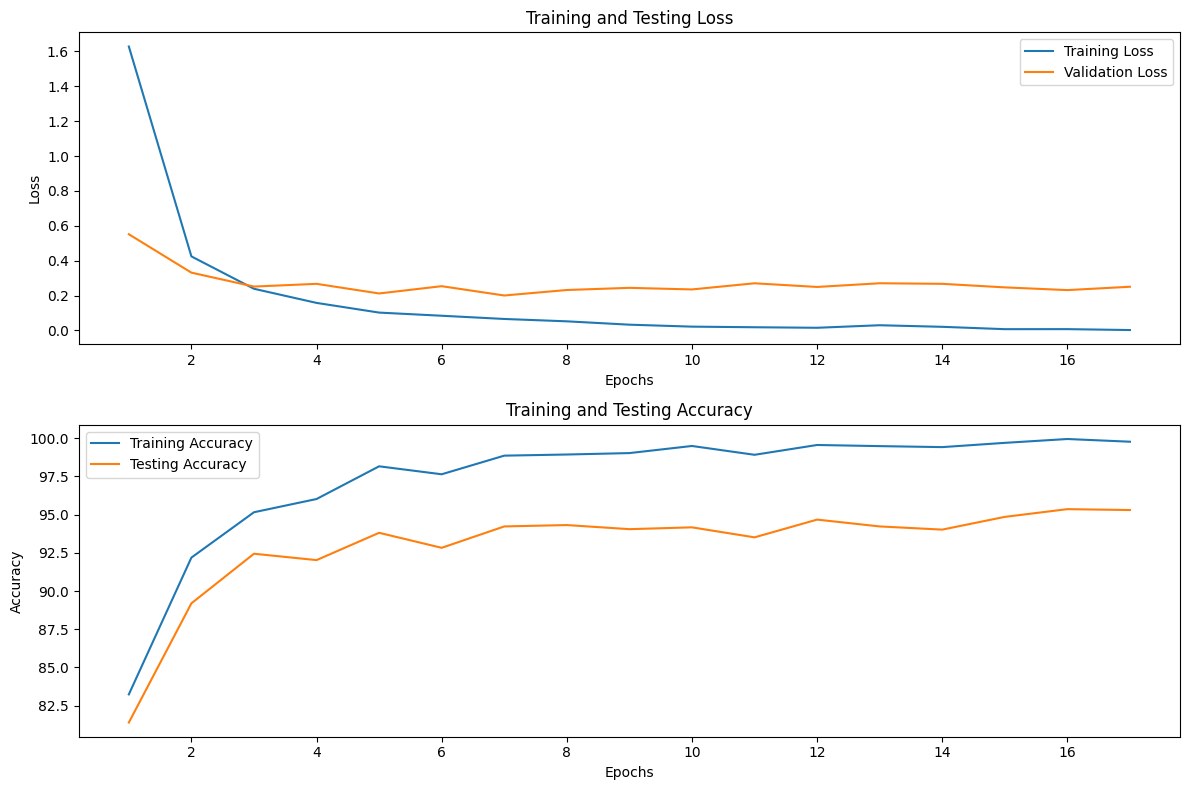

In [16]:
Trainer.plot_learning_curves(trainer)

# Paper 3

In [17]:
%%script false
Trainer.hyperparameter_tuning(ArabicCharCNN, train_loader, test_loader, param_grid, num_epochs=20)

Parameters: {'lr': 0.001, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 0.5043906136637643, Validation Accuracy: 82.58928571428571%
Labels with zero precision: [5]
Parameters: {'lr': 0.001, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 0.9619821806748708, Validation Accuracy: 67.41071428571429%
Parameters: {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 0.3898126816465741, Validation Accuracy: 88.65327380952381%
Labels with zero precision: [17]
Parameters: {'lr': 0.0005, 'weight_decay': 0.0001, 'val_ratio': 0.2}, Validation Loss: 1.2153316963286627, Validation Accuracy: 56.361607142857146%
Labels with zero precision: [2, 4, 5, 7, 9, 11, 14, 16, 17]
Parameters: {'lr': 0.0005, 'weight_decay': 1e-05, 'val_ratio': 0.2}, Validation Loss: 1.6310872634251912, Validation Accuracy: 34.04017857142857%
Labels with zero precision: [3, 5, 6, 7, 10, 13, 17, 21]
Parameters: {'lr': 0.0005, 'weight_decay': 0, 'val_ratio': 0.2}, Validation Loss: 1.41074685

(ArabicCharCNN(
   (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=4096, out_features=4096, bias=True)
   (fc2): Linear(in_features=4096, out_features=1024, bias=True)
   (fc3): Linear(in_features=1024, out_features=512, bias=True)
   (fc4): Linear(in_features=512, out_features=28, bias=True)
   (dropout): Dropout(p=0.8, inplace=False)
 ),
 {'lr': 0.001, 'weight_decay': 0, 'val_ratio': 0.2})

In [5]:
%%time
model = ArabicCharCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=1e-4,
                           num_epochs=100, early_stopping_patience=10)

cuda
Epoch 1/100, Train Loss: 3.5058, Train Acc: 5.51%, Test Loss: 3.3264, Test Acc: 5.60%, 
Epoch 2/100, Train Loss: 3.2955, Train Acc: 11.34%, Test Loss: 3.0683, Test Acc: 11.70%, 
Epoch 3/100, Train Loss: 3.0362, Train Acc: 14.13%, Test Loss: 2.7929, Test Acc: 13.57%, 
Epoch 4/100, Train Loss: 2.8442, Train Acc: 18.25%, Test Loss: 2.5231, Test Acc: 18.45%, 
Epoch 5/100, Train Loss: 2.6765, Train Acc: 20.76%, Test Loss: 2.5057, Test Acc: 20.48%, 
Epoch 6/100, Train Loss: 2.5147, Train Acc: 28.34%, Test Loss: 2.3176, Test Acc: 27.59%, 
Epoch 7/100, Train Loss: 2.3713, Train Acc: 24.73%, Test Loss: 2.2107, Test Acc: 24.46%, 
Epoch 8/100, Train Loss: 2.2146, Train Acc: 34.52%, Test Loss: 1.8184, Test Acc: 34.91%, 
Epoch 9/100, Train Loss: 2.0156, Train Acc: 39.25%, Test Loss: 1.6078, Test Acc: 38.87%, 
Epoch 10/100, Train Loss: 1.8529, Train Acc: 39.33%, Test Loss: 1.5105, Test Acc: 38.24%, 
Epoch 11/100, Train Loss: 1.7058, Train Acc: 51.32%, Test Loss: 1.3453, Test Acc: 50.09%, 
Epoch

In [6]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "ArabicCharCNN"
status = "No Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

/tmp/ipykernel_64008/3807150915.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])],)


In [7]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

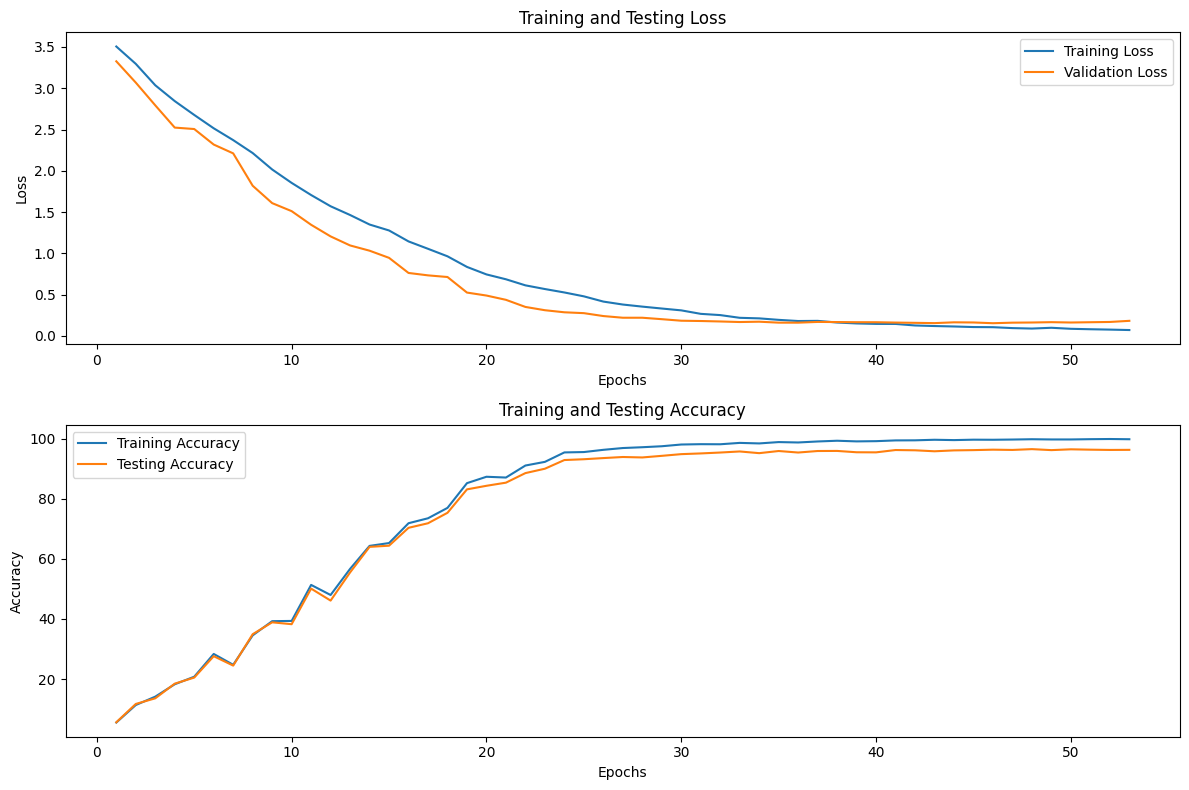

In [8]:
Trainer.plot_learning_curves(trainer)

# Task 2

In [5]:
augmentations = [
    transforms.RandomRotation(degrees=(-5, 5)),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02)), 
    transforms.RandomPerspective(distortion_scale=0.1, p=0.5), 
        transforms.RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1))
]

In [6]:
def random_transforms(image):

    image = image.transpose(0, 1).transpose(1, 2)
    
    n = random.randint(1, len(augmentations)) 
    
    transform = random.choice(augmentations)
    image = transform(image)
    return image

augmentations = [
    transforms.RandomRotation(degrees=(-5, 5)),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02)), 
    transforms.RandomPerspective(distortion_scale=0.1, p=0.5), 
    transforms.RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1))
]


transform = transforms.Compose([
    transforms.Lambda(random_transforms),
    transforms.Lambda(lambda x: x.transpose(0, 1).transpose(1, 2)),
])

train_dataset = AHCRDataset(train_images_path, train_labels_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [23]:
model = BaselineCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50
                           , early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 2.8530, Train Acc: 60.33%, Test Loss: 1.3146, Test Acc: 59.55%, 
Epoch 2/50, Train Loss: 1.5331, Train Acc: 78.11%, Test Loss: 0.7398, Test Acc: 76.52%, 
Epoch 3/50, Train Loss: 1.1141, Train Acc: 84.74%, Test Loss: 0.5523, Test Acc: 83.12%, 
Epoch 4/50, Train Loss: 0.9043, Train Acc: 85.61%, Test Loss: 0.4648, Test Acc: 85.15%, 
Epoch 5/50, Train Loss: 0.7830, Train Acc: 86.89%, Test Loss: 0.4450, Test Acc: 86.13%, 
Epoch 6/50, Train Loss: 0.6868, Train Acc: 90.63%, Test Loss: 0.3577, Test Acc: 88.63%, 
Epoch 7/50, Train Loss: 0.6282, Train Acc: 91.10%, Test Loss: 0.3396, Test Acc: 88.39%, 
Epoch 8/50, Train Loss: 0.5913, Train Acc: 92.65%, Test Loss: 0.3233, Test Acc: 90.21%, 
Epoch 9/50, Train Loss: 0.5394, Train Acc: 94.01%, Test Loss: 0.2998, Test Acc: 90.36%, 
Epoch 10/50, Train Loss: 0.4876, Train Acc: 94.27%, Test Loss: 0.2785, Test Acc: 90.83%, 
Epoch 11/50, Train Loss: 0.4594, Train Acc: 94.13%, Test Loss: 0.2752, Test Acc: 91.52%, 
Epoch 12/50, T

In [24]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "BaselineCNN"
status = "Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [25]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

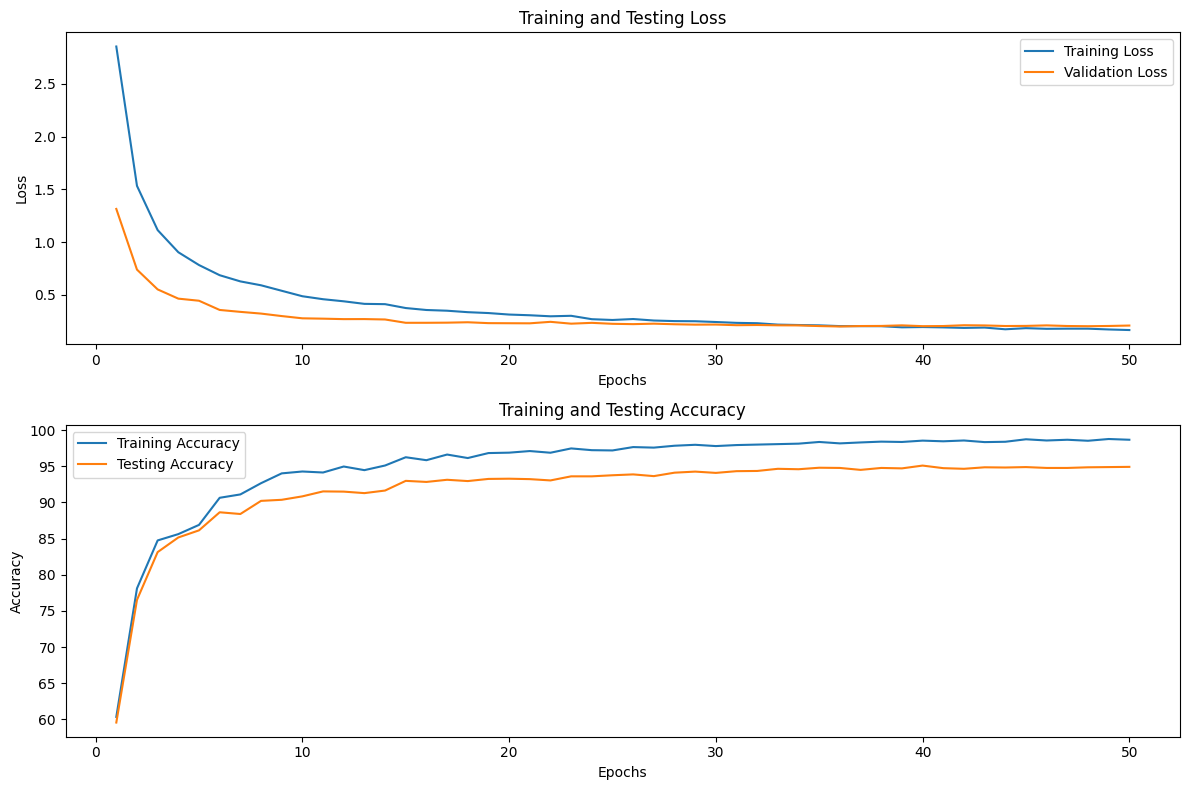

In [26]:
Trainer.plot_learning_curves(trainer)

# Paper 1 aug

In [27]:
model = CNN14()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                           early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 2.4830, Train Acc: 52.86%, Test Loss: 1.2728, Test Acc: 54.11%, 
Epoch 2/50, Train Loss: 0.8015, Train Acc: 85.39%, Test Loss: 0.4573, Test Acc: 85.15%, 
Epoch 3/50, Train Loss: 0.4024, Train Acc: 91.09%, Test Loss: 0.3191, Test Acc: 90.27%, 
Epoch 4/50, Train Loss: 0.2508, Train Acc: 95.15%, Test Loss: 0.2048, Test Acc: 93.93%, 
Epoch 5/50, Train Loss: 0.1849, Train Acc: 94.14%, Test Loss: 0.2728, Test Acc: 93.39%, 
Epoch 6/50, Train Loss: 0.1596, Train Acc: 97.08%, Test Loss: 0.1722, Test Acc: 95.51%, 
Epoch 7/50, Train Loss: 0.1186, Train Acc: 97.52%, Test Loss: 0.1617, Test Acc: 95.60%, 
Epoch 8/50, Train Loss: 0.1080, Train Acc: 96.47%, Test Loss: 0.2144, Test Acc: 95.00%, 
Epoch 9/50, Train Loss: 0.0974, Train Acc: 97.63%, Test Loss: 0.1645, Test Acc: 95.54%, 
Epoch 10/50, Train Loss: 0.0981, Train Acc: 98.17%, Test Loss: 0.1464, Test Acc: 96.73%, 
Epoch 11/50, Train Loss: 0.0751, Train Acc: 98.29%, Test Loss: 0.1509, Test Acc: 96.25%, 
Epoch 12/50, T

In [28]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "CNN14"
status = "Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [29]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

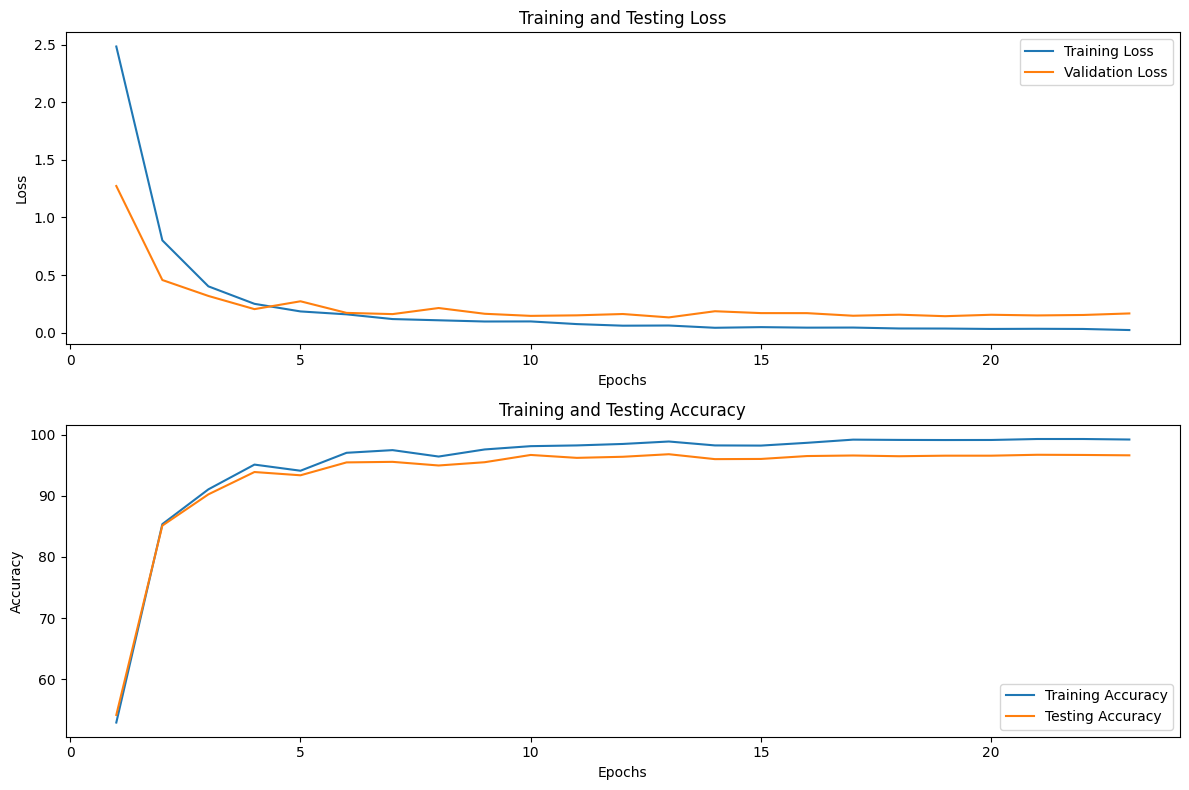

In [30]:
Trainer.plot_learning_curves(trainer)

# Paper 2 aug

In [36]:
model = CustomCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=1e-5, num_epochs=35, 
                           early_stopping_patience=10)

cuda
Epoch 1/35, Train Loss: 1.5591, Train Acc: 82.26%, Test Loss: 0.5017, Test Acc: 81.99%, 
Epoch 2/35, Train Loss: 0.4439, Train Acc: 90.10%, Test Loss: 0.3290, Test Acc: 89.58%, 
Epoch 3/35, Train Loss: 0.2667, Train Acc: 92.05%, Test Loss: 0.2917, Test Acc: 91.28%, 
Epoch 4/35, Train Loss: 0.2028, Train Acc: 95.48%, Test Loss: 0.2178, Test Acc: 93.10%, 
Epoch 5/35, Train Loss: 0.1539, Train Acc: 96.07%, Test Loss: 0.1980, Test Acc: 94.29%, 
Epoch 6/35, Train Loss: 0.1276, Train Acc: 95.85%, Test Loss: 0.2154, Test Acc: 93.87%, 
Epoch 7/35, Train Loss: 0.1183, Train Acc: 97.48%, Test Loss: 0.1777, Test Acc: 95.33%, 
Epoch 8/35, Train Loss: 0.0906, Train Acc: 95.85%, Test Loss: 0.2416, Test Acc: 93.87%, 
Epoch 9/35, Train Loss: 0.0860, Train Acc: 97.90%, Test Loss: 0.1916, Test Acc: 95.30%, 
Epoch 10/35, Train Loss: 0.0788, Train Acc: 98.90%, Test Loss: 0.1600, Test Acc: 96.04%, 
Epoch 11/35, Train Loss: 0.0555, Train Acc: 97.75%, Test Loss: 0.2063, Test Acc: 94.97%, 
Epoch 12/35, T

In [37]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "Paper 2"
status = "Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [38]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

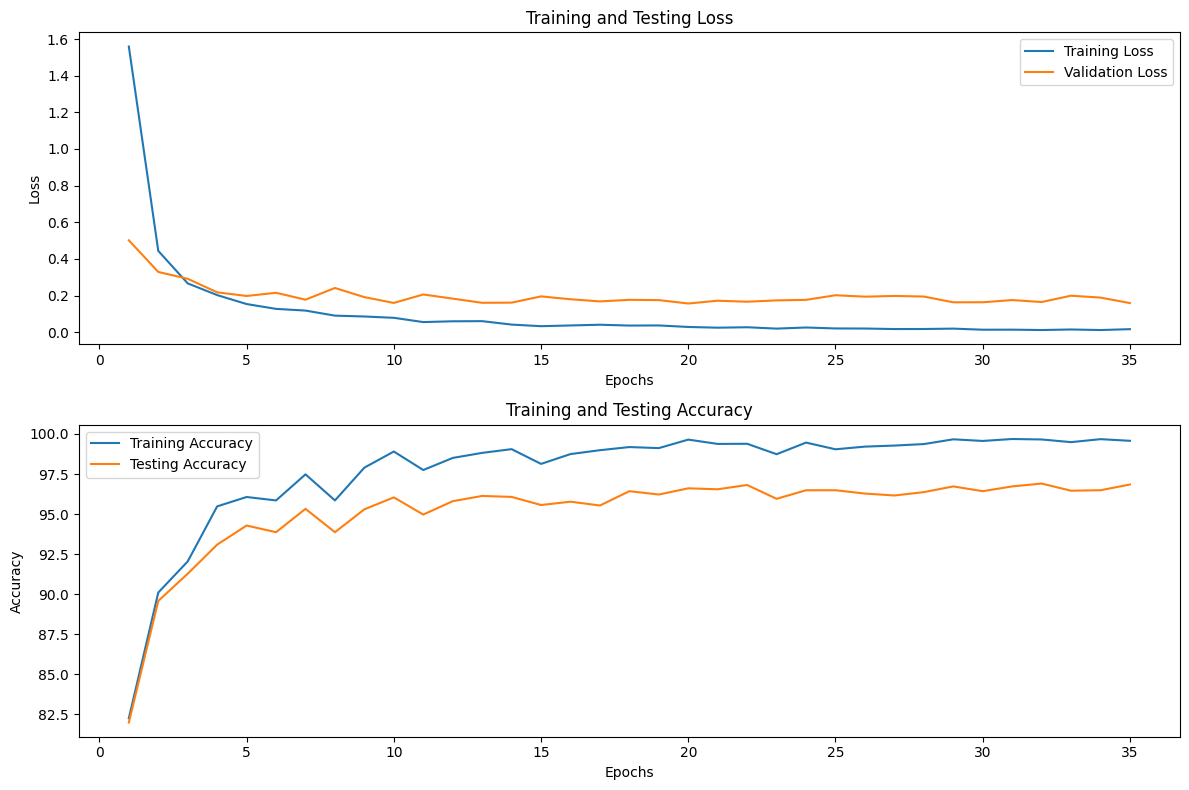

In [39]:
Trainer.plot_learning_curves(trainer)

# Paper 3

In [40]:
model = ArabicCharCNN()
trainer = Trainer.do_train(model, train_loader, test_loader, lr = 0.001, val_ratio=0.2, weight_decay=0,
                           num_epochs=100, early_stopping_patience=10)

cuda
Epoch 1/100, Train Loss: 3.5227, Train Acc: 4.24%, Test Loss: 3.3311, Test Acc: 4.14%, 
Epoch 2/100, Train Loss: 3.3234, Train Acc: 7.77%, Test Loss: 3.2673, Test Acc: 7.80%, 
Epoch 3/100, Train Loss: 3.1667, Train Acc: 14.07%, Test Loss: 2.9620, Test Acc: 13.42%, 
Epoch 4/100, Train Loss: 2.9816, Train Acc: 15.61%, Test Loss: 2.5905, Test Acc: 15.09%, 
Epoch 5/100, Train Loss: 2.7428, Train Acc: 18.29%, Test Loss: 2.5298, Test Acc: 18.57%, 
Epoch 6/100, Train Loss: 2.5672, Train Acc: 19.97%, Test Loss: 2.3239, Test Acc: 20.30%, 
Epoch 7/100, Train Loss: 2.4284, Train Acc: 21.57%, Test Loss: 2.2118, Test Acc: 22.11%, 
Epoch 8/100, Train Loss: 2.2975, Train Acc: 18.02%, Test Loss: 2.2216, Test Acc: 18.18%, 
Epoch 9/100, Train Loss: 2.1974, Train Acc: 22.32%, Test Loss: 2.0240, Test Acc: 21.70%, 
Epoch 10/100, Train Loss: 2.0792, Train Acc: 25.13%, Test Loss: 1.9007, Test Acc: 25.83%, 
Epoch 11/100, Train Loss: 1.9373, Train Acc: 36.35%, Test Loss: 1.5975, Test Acc: 36.16%, 
Epoch 1

In [41]:
all_results = trainer.evaluate_loader(test_loader)
model_name = "ArabicCharCNN"
status = "Augmentation"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [42]:
model_save_path = model_name +  status + ".pth" 
torch.save(model.state_dict(), model_save_path)

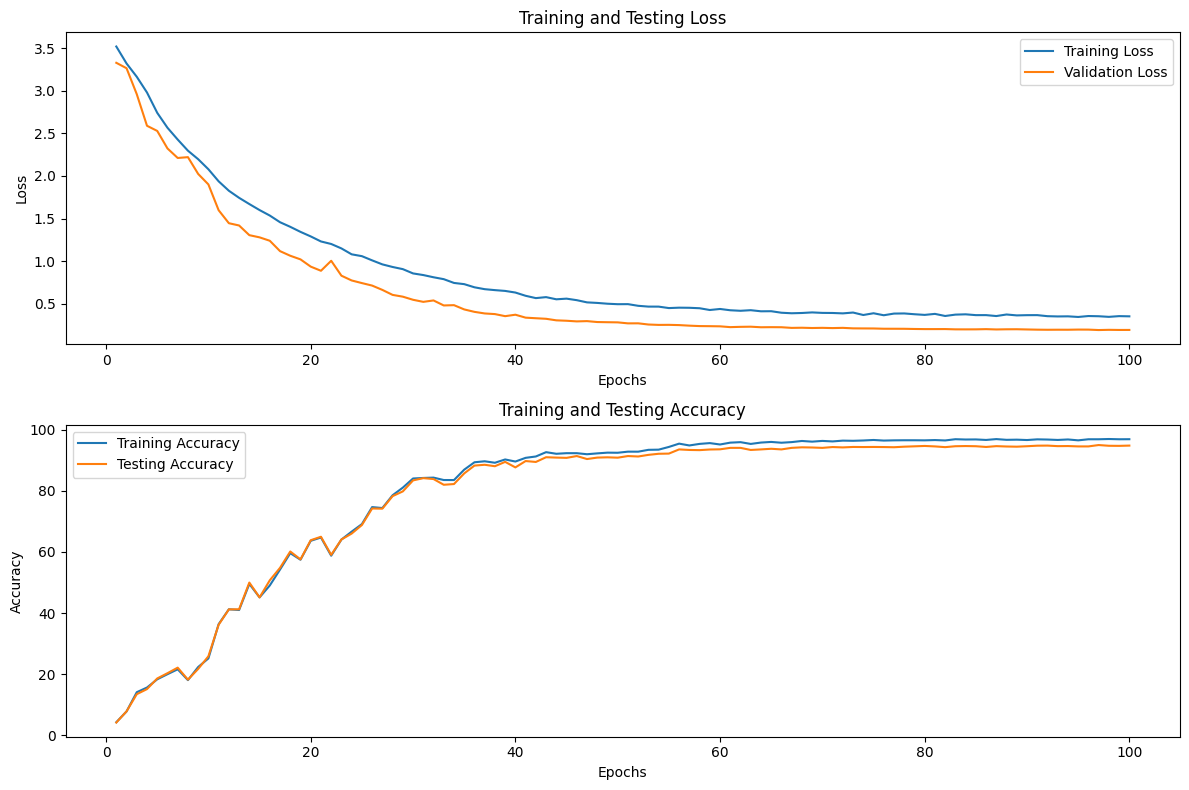

In [43]:
Trainer.plot_learning_curves(trainer)

In [7]:
from importlib import reload
import torchvision.models as models

# Task 3

In [8]:
alexnet = models.alexnet(weights=None)
resnet18 = models.resnet18(weights=None)

In [9]:
%%time
alexnet_model = alexnet 
alexnet_model.features[0] = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
lenet_trainer = Trainer.do_train(alexnet_model, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50)

cuda
Epoch 1/50, Train Loss: 3.9609, Train Acc: 18.43%, Test Loss: 2.4979, Test Acc: 17.71%, 
Epoch 2/50, Train Loss: 1.8046, Train Acc: 52.91%, Test Loss: 1.2707, Test Acc: 53.33%, 
Epoch 3/50, Train Loss: 1.1567, Train Acc: 67.49%, Test Loss: 0.9115, Test Acc: 66.10%, 
Epoch 4/50, Train Loss: 0.8404, Train Acc: 76.59%, Test Loss: 0.6982, Test Acc: 76.01%, 
Epoch 5/50, Train Loss: 0.6989, Train Acc: 81.99%, Test Loss: 0.6216, Test Acc: 79.85%, 
Epoch 6/50, Train Loss: 0.5709, Train Acc: 84.99%, Test Loss: 0.5504, Test Acc: 82.62%, 
Epoch 7/50, Train Loss: 0.4950, Train Acc: 86.35%, Test Loss: 0.5305, Test Acc: 83.69%, 
Epoch 8/50, Train Loss: 0.4286, Train Acc: 88.64%, Test Loss: 0.4419, Test Acc: 87.05%, 
Epoch 9/50, Train Loss: 0.3845, Train Acc: 91.72%, Test Loss: 0.3572, Test Acc: 89.52%, 
Epoch 10/50, Train Loss: 0.3415, Train Acc: 92.78%, Test Loss: 0.3364, Test Acc: 90.92%, 
Epoch 11/50, Train Loss: 0.2987, Train Acc: 92.77%, Test Loss: 0.3626, Test Acc: 90.30%, 
Epoch 12/50, T

In [10]:
all_results = lenet_trainer.evaluate_loader(test_loader)
model_name = "AlexNet"
status = "Augmentation + Re-Train"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

/tmp/ipykernel_69717/3128001383.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_row])],)


In [12]:
model_save_path = model_name +  status + ".pth" 
torch.save(alexnet_model.state_dict(), model_save_path)

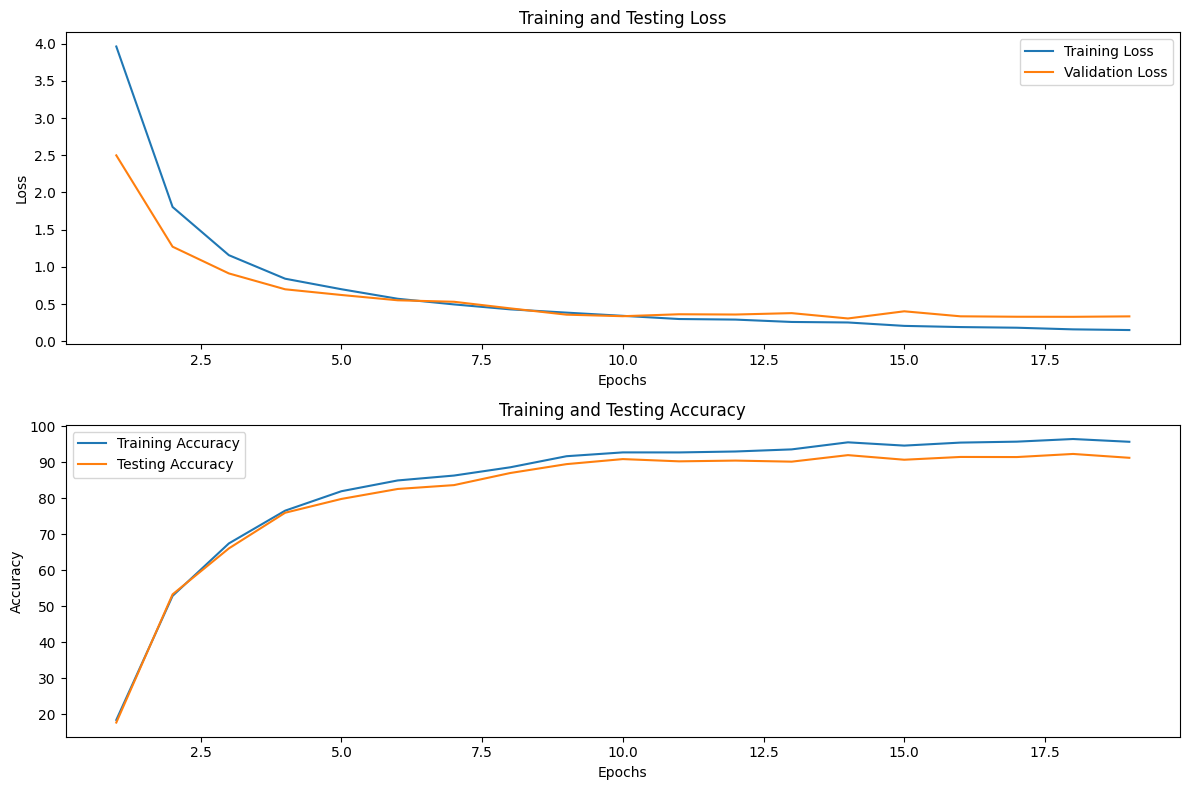

In [13]:
Trainer.plot_learning_curves(lenet_trainer)

In [14]:
%%time
resnet18_model = resnet18 
resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_trainer = Trainer.do_train(resnet18_model, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50)


cuda
Epoch 1/50, Train Loss: 1.3765, Train Acc: 69.17%, Test Loss: 0.9042, Test Acc: 67.83%, 
Epoch 2/50, Train Loss: 0.5920, Train Acc: 74.52%, Test Loss: 0.8292, Test Acc: 72.74%, 
Epoch 3/50, Train Loss: 0.4082, Train Acc: 82.71%, Test Loss: 0.5910, Test Acc: 80.09%, 
Epoch 4/50, Train Loss: 0.3174, Train Acc: 87.37%, Test Loss: 0.4503, Test Acc: 85.65%, 
Epoch 5/50, Train Loss: 0.2585, Train Acc: 94.27%, Test Loss: 0.2613, Test Acc: 92.02%, 
Epoch 6/50, Train Loss: 0.1981, Train Acc: 94.43%, Test Loss: 0.2619, Test Acc: 92.11%, 
Epoch 7/50, Train Loss: 0.1803, Train Acc: 95.24%, Test Loss: 0.2495, Test Acc: 92.47%, 
Epoch 8/50, Train Loss: 0.1421, Train Acc: 94.30%, Test Loss: 0.2756, Test Acc: 91.61%, 
Epoch 9/50, Train Loss: 0.1456, Train Acc: 95.74%, Test Loss: 0.2286, Test Acc: 92.74%, 
Epoch 10/50, Train Loss: 0.1335, Train Acc: 96.03%, Test Loss: 0.2283, Test Acc: 93.15%, 
Epoch 11/50, Train Loss: 0.1153, Train Acc: 96.91%, Test Loss: 0.2235, Test Acc: 93.63%, 
Epoch 12/50, T

In [15]:
all_results = resnet18_trainer.evaluate_loader(test_loader)
model_name = "ResNet18"
status = "Augmentation + Re-Train"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [16]:
model_save_path = model_name +  status + ".pth" 
torch.save(resnet18_model.state_dict(), model_save_path)

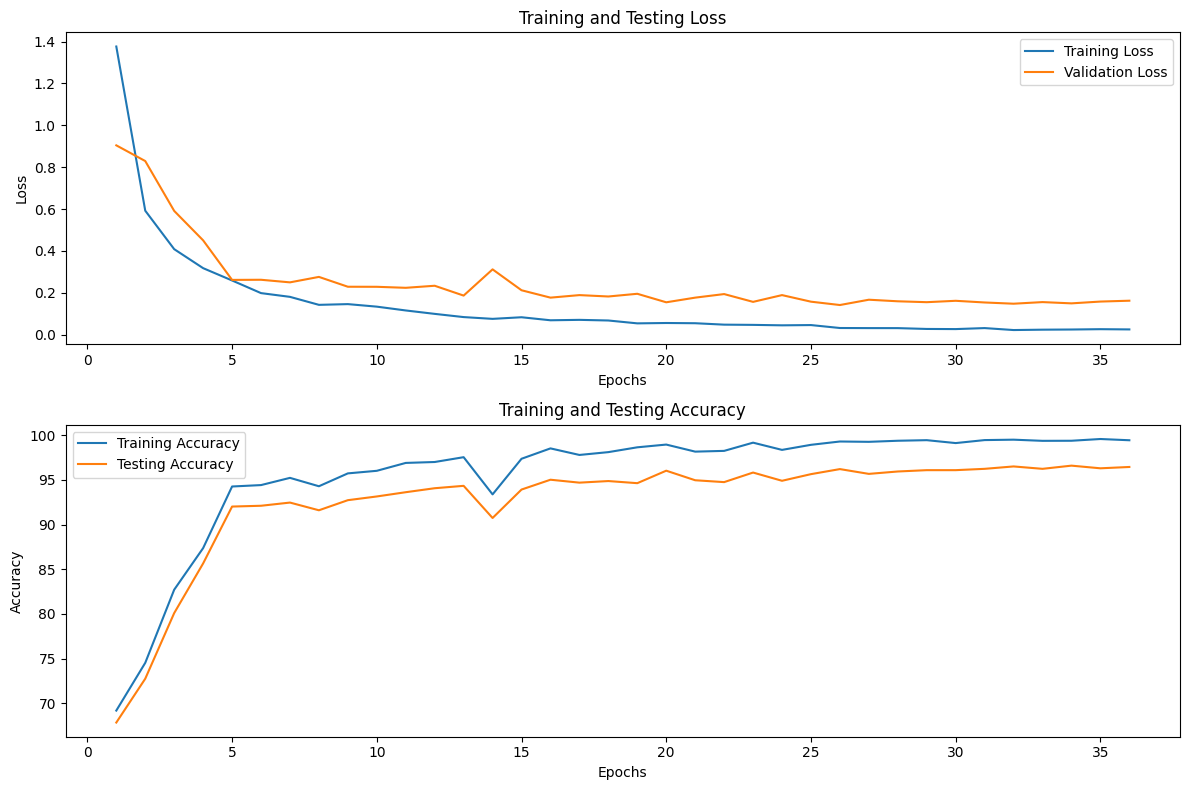

In [17]:
Trainer.plot_learning_curves(resnet18_trainer)

In [18]:
results_df['Avg_Precision'] = results_df['Precision'].apply(lambda x: sum(x) / len(x))
results_df['Avg_Recall'] = results_df['Recall'].apply(lambda x: sum(x) / len(x))
results_df['Avg_F1'] = results_df['F1'].apply(lambda x: sum(x) / len(x))


In [19]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']].to_csv('results1111111.csv', index=False)

In [12]:
resnet152 = models.resnet152(weights=None)
resnet152_model = resnet152 


In [13]:
%%time
resnet152_model = resnet152 
resnet152.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet152_trainer = Trainer.do_train(resnet152_model, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50)


cuda
Epoch 1/50, Train Loss: 2.9686, Train Acc: 20.78%, Test Loss: 5.4768, Test Acc: 20.39%, 
Epoch 2/50, Train Loss: 2.0683, Train Acc: 46.35%, Test Loss: 1.7261, Test Acc: 44.05%, 
Epoch 3/50, Train Loss: 1.5653, Train Acc: 54.19%, Test Loss: 1.4050, Test Acc: 51.85%, 
Epoch 4/50, Train Loss: 1.2162, Train Acc: 52.59%, Test Loss: 2.0264, Test Acc: 49.05%, 
Epoch 5/50, Train Loss: 1.1551, Train Acc: 61.10%, Test Loss: 3.5988, Test Acc: 59.85%, 
Epoch 6/50, Train Loss: 0.8687, Train Acc: 71.18%, Test Loss: 1.0755, Test Acc: 67.62%, 
Epoch 7/50, Train Loss: 0.9165, Train Acc: 71.35%, Test Loss: 0.9534, Test Acc: 69.46%, 
Epoch 8/50, Train Loss: 0.6779, Train Acc: 77.98%, Test Loss: 0.7259, Test Acc: 75.27%, 
Epoch 9/50, Train Loss: 0.5415, Train Acc: 80.94%, Test Loss: 0.6339, Test Acc: 76.58%, 
Epoch 10/50, Train Loss: 0.4363, Train Acc: 89.83%, Test Loss: 0.4407, Test Acc: 84.76%, 
Epoch 11/50, Train Loss: 0.3851, Train Acc: 90.48%, Test Loss: 0.4314, Test Acc: 85.39%, 
Epoch 12/50, T

In [14]:

all_results = resnet152_trainer.evaluate_loader(test_loader)
model_name = "ResNet152"
status = "Augmentation + Re-Train"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

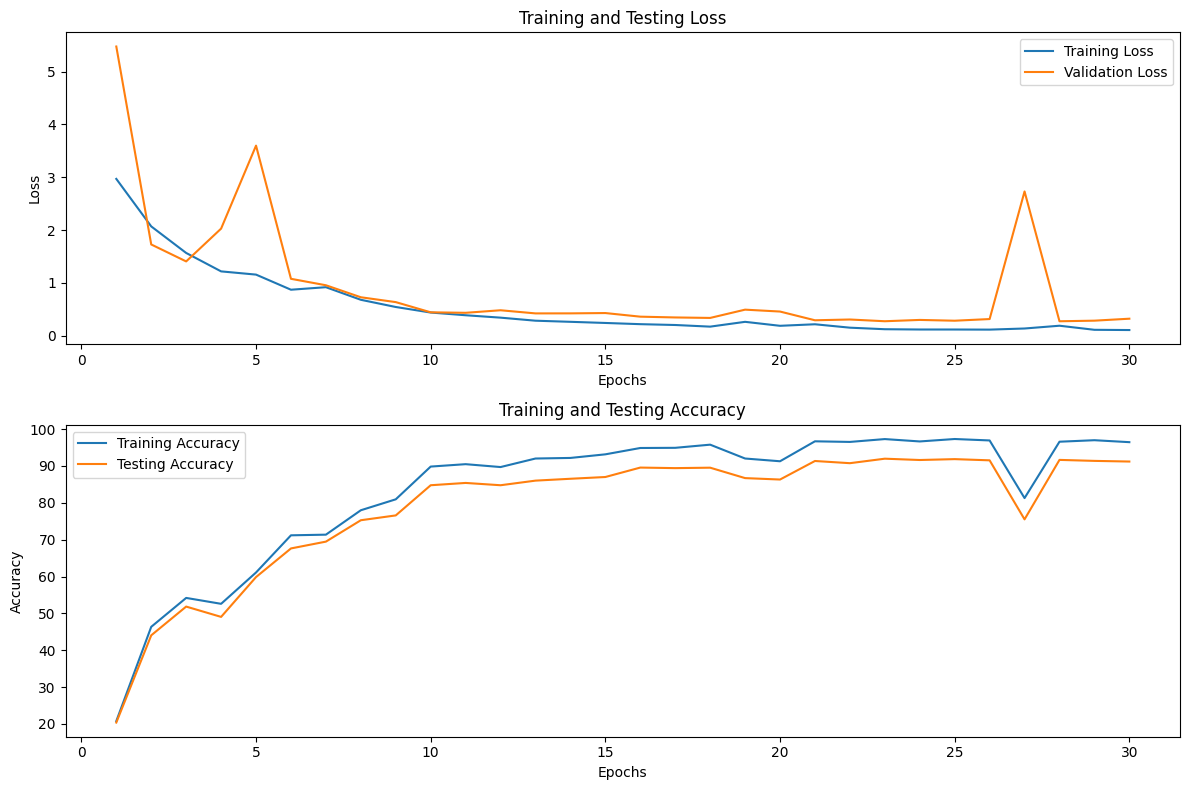

In [15]:
Trainer.plot_learning_curves(resnet152_trainer)

In [22]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']]

,Model,Status,Accuracy,Avg_Precision,Avg_Recall,Avg_F1
0,AlexNet,Augmentation + Re-Train,91.279762,0.916822,0.912798,0.912783
0,ResNet18,Augmentation + Re-Train,96.458333,0.965937,0.964583,0.964628


In [20]:
alexnet = models.alexnet(weights='IMAGENET1K_V1')
resnet18 = models.resnet18(weights='IMAGENET1K_V1')
resnet152 = models.resnet152(weights='IMAGENET1K_V1')

In [33]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [35]:
%%time
alexnet_model = alexnet 
alexnet_model.features[0] = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
alexnet_trainer = Trainer.do_train(alexnet_model, train_loader, test_loader, lr=0.005, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=20)

cuda
Epoch 1/100, Train Loss: 3.7687, Train Acc: 7.90%, Test Loss: 2.8588, Test Acc: 7.77%, 
Epoch 2/100, Train Loss: 3.2864, Train Acc: 3.65%, Test Loss: 3.3755, Test Acc: 3.57%, 
Epoch 3/100, Train Loss: 3.3697, Train Acc: 3.67%, Test Loss: 3.3706, Test Acc: 3.57%, 
Epoch 4/100, Train Loss: 3.6590, Train Acc: 3.60%, Test Loss: 3.3663, Test Acc: 3.57%, 
Epoch 5/100, Train Loss: 3.3763, Train Acc: 3.59%, Test Loss: 3.3631, Test Acc: 3.57%, 
Epoch 6/100, Train Loss: 3.6695, Train Acc: 3.71%, Test Loss: 3.3583, Test Acc: 3.57%, 
Epoch 7/100, Train Loss: 3.3599, Train Acc: 3.62%, Test Loss: 3.3518, Test Acc: 3.57%, 
Epoch 8/100, Train Loss: 3.3593, Train Acc: 3.57%, Test Loss: 3.3495, Test Acc: 3.57%, 
Epoch 9/100, Train Loss: 3.3573, Train Acc: 3.63%, Test Loss: 3.3519, Test Acc: 3.57%, 
Epoch 10/100, Train Loss: 6.4538, Train Acc: 3.63%, Test Loss: 3.3619, Test Acc: 3.57%, 
Epoch 11/100, Train Loss: 3.3723, Train Acc: 3.62%, Test Loss: 3.3498, Test Acc: 3.57%, 
Epoch 12/100, Train Loss:

In [36]:
all_results = alexnet_trainer.evaluate_loader(test_loader)
model_name = "AlexNet"
status = "Augmentation + Finetune Train"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

In [37]:
results_df['Avg_Precision'] = results_df['Precision'].apply(lambda x: sum(x) / len(x))
results_df['Avg_Recall'] = results_df['Recall'].apply(lambda x: sum(x) / len(x))
results_df['Avg_F1'] = results_df['F1'].apply(lambda x: sum(x) / len(x))


In [38]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']].to_csv('results2.csv', index=False)

In [46]:
%%time
resnet18_model = resnet18 
resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_trainer = Trainer.do_train(resnet18_model, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50)


cuda
Epoch 1/50, Train Loss: 2.1232, Train Acc: 64.13%, Test Loss: 1.0445, Test Acc: 63.78%, 
Epoch 2/50, Train Loss: 0.7767, Train Acc: 78.95%, Test Loss: 0.6586, Test Acc: 78.57%, 
Epoch 3/50, Train Loss: 0.5212, Train Acc: 88.58%, Test Loss: 0.3739, Test Acc: 86.96%, 
Epoch 4/50, Train Loss: 0.3867, Train Acc: 89.64%, Test Loss: 0.3482, Test Acc: 88.87%, 
Epoch 5/50, Train Loss: 0.3375, Train Acc: 83.95%, Test Loss: 0.5717, Test Acc: 81.93%, 
Epoch 6/50, Train Loss: 0.2723, Train Acc: 90.59%, Test Loss: 0.3709, Test Acc: 87.95%, 
Epoch 7/50, Train Loss: 0.2159, Train Acc: 91.60%, Test Loss: 0.2898, Test Acc: 90.30%, 
Epoch 8/50, Train Loss: 0.1935, Train Acc: 93.35%, Test Loss: 0.3023, Test Acc: 90.68%, 
Epoch 9/50, Train Loss: 0.1766, Train Acc: 94.81%, Test Loss: 0.2530, Test Acc: 92.32%, 
Epoch 10/50, Train Loss: 0.1535, Train Acc: 94.57%, Test Loss: 0.2692, Test Acc: 91.90%, 
Epoch 11/50, Train Loss: 0.1557, Train Acc: 90.15%, Test Loss: 0.4803, Test Acc: 86.85%, 
Epoch 12/50, T

In [47]:
all_results = resnet18_trainer.evaluate_loader(test_loader)
model_name = "ResNet18"
status = "Augmentation + Finetune"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

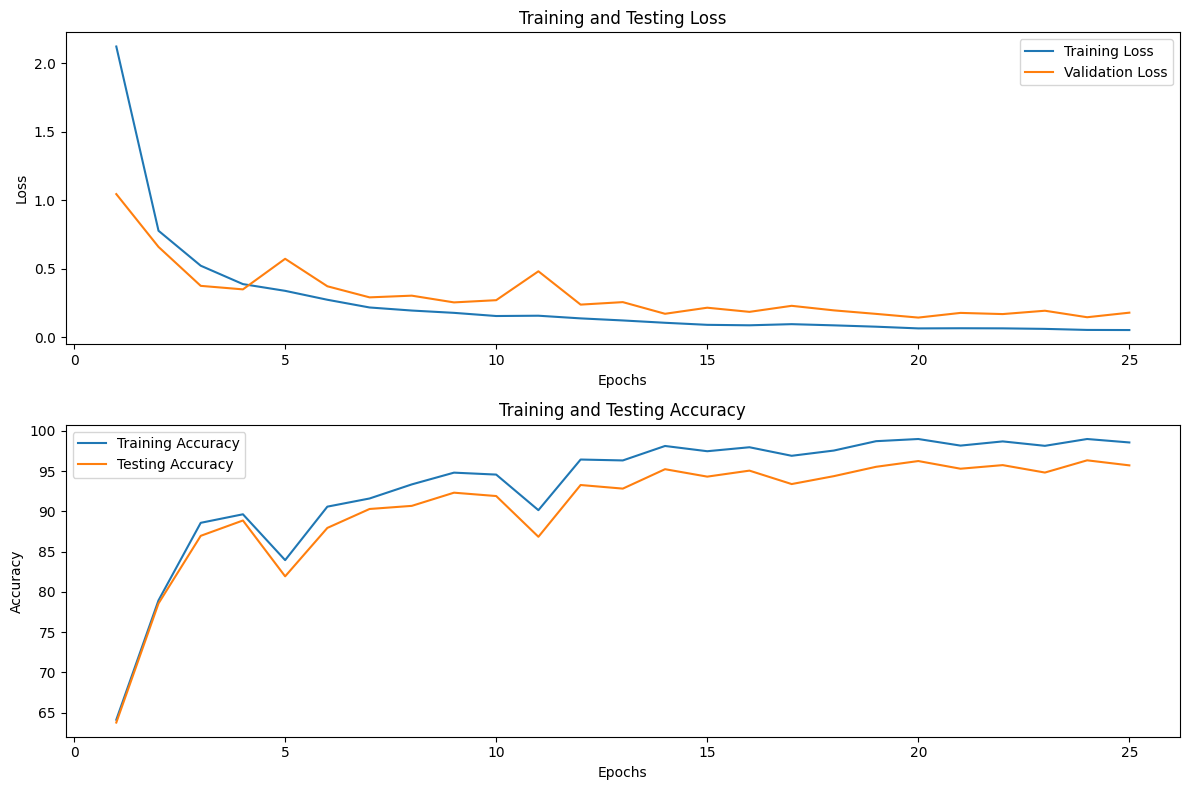

In [48]:
Trainer.plot_learning_curves(resnet18_trainer)

In [38]:
results_df['Avg_Precision'] = results_df['Precision'].apply(lambda x: sum(x) / len(x))
results_df['Avg_Recall'] = results_df['Recall'].apply(lambda x: sum(x) / len(x))
results_df['Avg_F1'] = results_df['F1'].apply(lambda x: sum(x) / len(x))


In [39]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']].to_csv('results4.csv', index=False)

In [8]:
!git clone https://github.com/XavierSpycy/EMNIST-Classifier.git
%cd EMNIST-Classifier

fatal: destination path 'EMNIST-Classifier' already exists and is not an empty directory.
/home/ahmad/Desktop/Computer Vision/Computer-Vision-Project/EMNIST-Classifier


/home/ahmad/anaconda3/envs/torch/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
import torch
from torch.utils.data import DataLoader
from charclf.models import VGGNet, AlexNet, SpinalNet, ResNet
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alexnet = AlexNet()
alexnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned//alexnet_tuned.pth", map_location=device))
alexnet.classifier[8] = nn.Linear(in_features=1024, out_features=28, bias=True)

In [ ]:
param_grid = {
    'lr': [0.001, 0.0005],
    'weight_decay': [1e-4, 1e-5, 0],
    'val_ratio': [0.2]
}

Trainer.hyperparameter_tuning(alexnet, train_loader, test_loader, param_grid, num_epochs=40)

In [10]:
%%time
alexnet_trainer = Trainer.do_train(alexnet, train_loader, test_loader, lr=0.005, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 1.1544, Train Acc: 86.77%, Test Loss: 0.3907, Test Acc: 87.29%, 
Epoch 2/50, Train Loss: 0.4143, Train Acc: 91.91%, Test Loss: 0.2356, Test Acc: 91.73%, 
Epoch 3/50, Train Loss: 0.3352, Train Acc: 92.96%, Test Loss: 0.2254, Test Acc: 92.50%, 
Epoch 4/50, Train Loss: 0.2710, Train Acc: 93.76%, Test Loss: 0.1993, Test Acc: 93.51%, 
Epoch 5/50, Train Loss: 0.2477, Train Acc: 95.47%, Test Loss: 0.1579, Test Acc: 94.70%, 
Epoch 6/50, Train Loss: 0.2261, Train Acc: 95.74%, Test Loss: 0.1560, Test Acc: 95.57%, 
Epoch 7/50, Train Loss: 0.2116, Train Acc: 96.21%, Test Loss: 0.1430, Test Acc: 95.54%, 
Epoch 8/50, Train Loss: 0.1927, Train Acc: 96.21%, Test Loss: 0.1524, Test Acc: 95.12%, 
Epoch 9/50, Train Loss: 0.1771, Train Acc: 96.70%, Test Loss: 0.1559, Test Acc: 95.60%, 
Epoch 10/50, Train Loss: 0.1760, Train Acc: 97.01%, Test Loss: 0.1349, Test Acc: 95.83%, 
Epoch 11/50, Train Loss: 0.1706, Train Acc: 96.94%, Test Loss: 0.1383, Test Acc: 95.71%, 
Epoch 12/50, T

In [11]:
all_results = alexnet_trainer.evaluate_loader(test_loader)
model_name = "AlexNet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

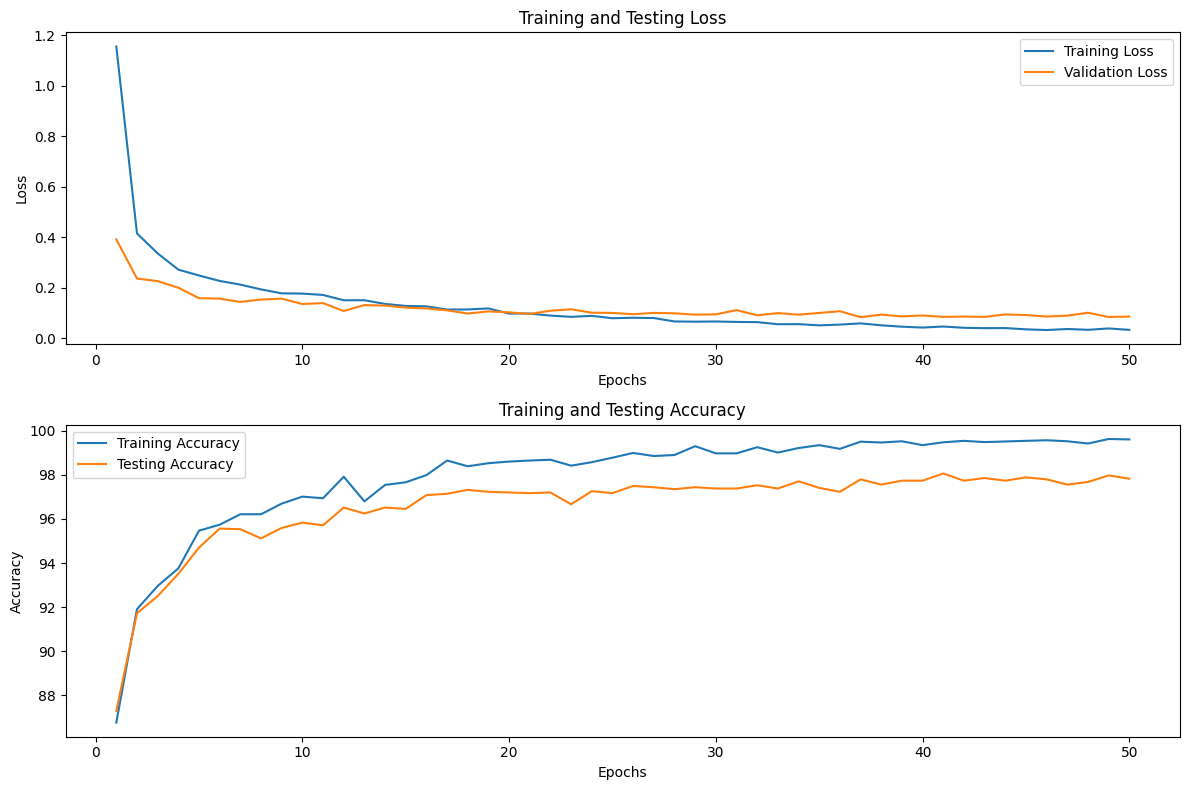

In [12]:
Trainer.plot_learning_curves(alexnet_trainer)

In [ ]:
results_df[['Model', 'Status', 'Accuracy', 'Avg_Precision', 'Avg_Recall', 'Avg_F1']].to_csv('results4.csv', index=False)

In [13]:
vggnet

VGGNet(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), paddi

In [17]:
import torch.nn as nn
vggnet = VGGNet()
vggnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned/vggnet_tuned.pth", map_location=device))
vggnet.classifier[8] = nn.Linear(in_features=512, out_features=28, bias=True)

In [18]:
%%time
vggnet_trainer = Trainer.do_train(vggnet, train_loader, test_loader, lr=0.0005, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=10)

cuda
Epoch 1/50, Train Loss: 3.0126, Train Acc: 48.61%, Test Loss: 2.4119, Test Acc: 51.25%, 
Epoch 2/50, Train Loss: 1.8751, Train Acc: 74.43%, Test Loss: 1.2124, Test Acc: 74.43%, 
Epoch 3/50, Train Loss: 1.0689, Train Acc: 84.82%, Test Loss: 0.6830, Test Acc: 85.21%, 
Epoch 4/50, Train Loss: 0.6913, Train Acc: 88.91%, Test Loss: 0.4620, Test Acc: 88.30%, 
Epoch 5/50, Train Loss: 0.4941, Train Acc: 91.85%, Test Loss: 0.3169, Test Acc: 92.35%, 
Epoch 6/50, Train Loss: 0.3850, Train Acc: 93.17%, Test Loss: 0.2590, Test Acc: 92.47%, 
Epoch 7/50, Train Loss: 0.3194, Train Acc: 94.61%, Test Loss: 0.2117, Test Acc: 94.55%, 
Epoch 8/50, Train Loss: 0.2806, Train Acc: 94.92%, Test Loss: 0.1899, Test Acc: 94.49%, 
Epoch 9/50, Train Loss: 0.2499, Train Acc: 95.68%, Test Loss: 0.1663, Test Acc: 95.06%, 
Epoch 10/50, Train Loss: 0.2189, Train Acc: 96.17%, Test Loss: 0.1604, Test Acc: 94.91%, 
Epoch 11/50, Train Loss: 0.1981, Train Acc: 96.51%, Test Loss: 0.1466, Test Acc: 95.39%, 
Epoch 12/50, T

In [19]:
all_results = alexnet_trainer.evaluate_loader(test_loader)
model_name = "VGGnet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

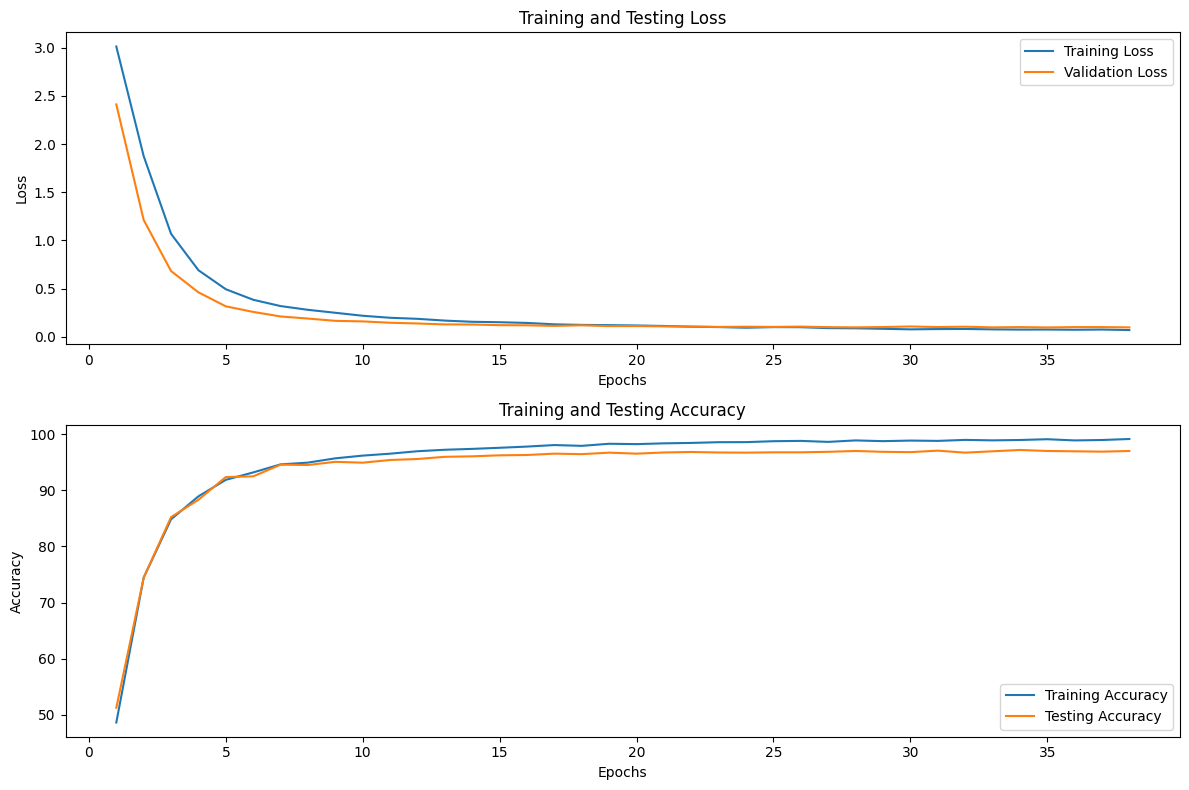

In [20]:
Trainer.plot_learning_curves(vggnet_trainer)

In [32]:

resnet = ResNet()
resnet.to(device).load_state_dict(torch.load("model_hub/fine_tuned/resnet_tuned.pth", map_location=device))
resnet

ResNet(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [33]:
resnet.model[10] = nn.Linear(in_features=128, out_features=28, bias=True)

In [34]:
%%time
resnet_trainer = Trainer.do_train(resnet, train_loader, test_loader, lr=0.001, val_ratio=0.2, weight_decay=0.0001, num_epochs=50,
                                   early_stopping_patience=20)

cuda
Epoch 1/50, Train Loss: 2.0805, Train Acc: 78.69%, Test Loss: 0.8969, Test Acc: 77.44%, 
Epoch 2/50, Train Loss: 0.5491, Train Acc: 91.70%, Test Loss: 0.3293, Test Acc: 91.13%, 
Epoch 3/50, Train Loss: 0.2615, Train Acc: 95.55%, Test Loss: 0.2022, Test Acc: 94.20%, 
Epoch 4/50, Train Loss: 0.1807, Train Acc: 96.47%, Test Loss: 0.1679, Test Acc: 94.97%, 
Epoch 5/50, Train Loss: 0.1352, Train Acc: 97.19%, Test Loss: 0.1497, Test Acc: 95.30%, 
Epoch 6/50, Train Loss: 0.1070, Train Acc: 97.93%, Test Loss: 0.1359, Test Acc: 95.95%, 
Epoch 7/50, Train Loss: 0.0931, Train Acc: 98.61%, Test Loss: 0.1243, Test Acc: 96.07%, 
Epoch 8/50, Train Loss: 0.0759, Train Acc: 98.61%, Test Loss: 0.1217, Test Acc: 96.43%, 
Epoch 9/50, Train Loss: 0.0636, Train Acc: 98.63%, Test Loss: 0.1208, Test Acc: 96.40%, 
Epoch 10/50, Train Loss: 0.0585, Train Acc: 99.03%, Test Loss: 0.1270, Test Acc: 96.52%, 
Epoch 11/50, Train Loss: 0.0570, Train Acc: 99.20%, Test Loss: 0.1199, Test Acc: 96.37%, 
Epoch 12/50, T

In [35]:
all_results = resnet_trainer.evaluate_loader(test_loader)
model_name = "Resnet"
status = "Augmentation + Finetune Train On EMNIST"

new_row = {
    "Model": model_name,
    "Status": status,
    "Accuracy": all_results[1],
    "Precision": all_results[2],
    "Recall": all_results[3],
    "F1": all_results[4],
}

results_df = pd.concat([results_df, pd.DataFrame([new_row])],)

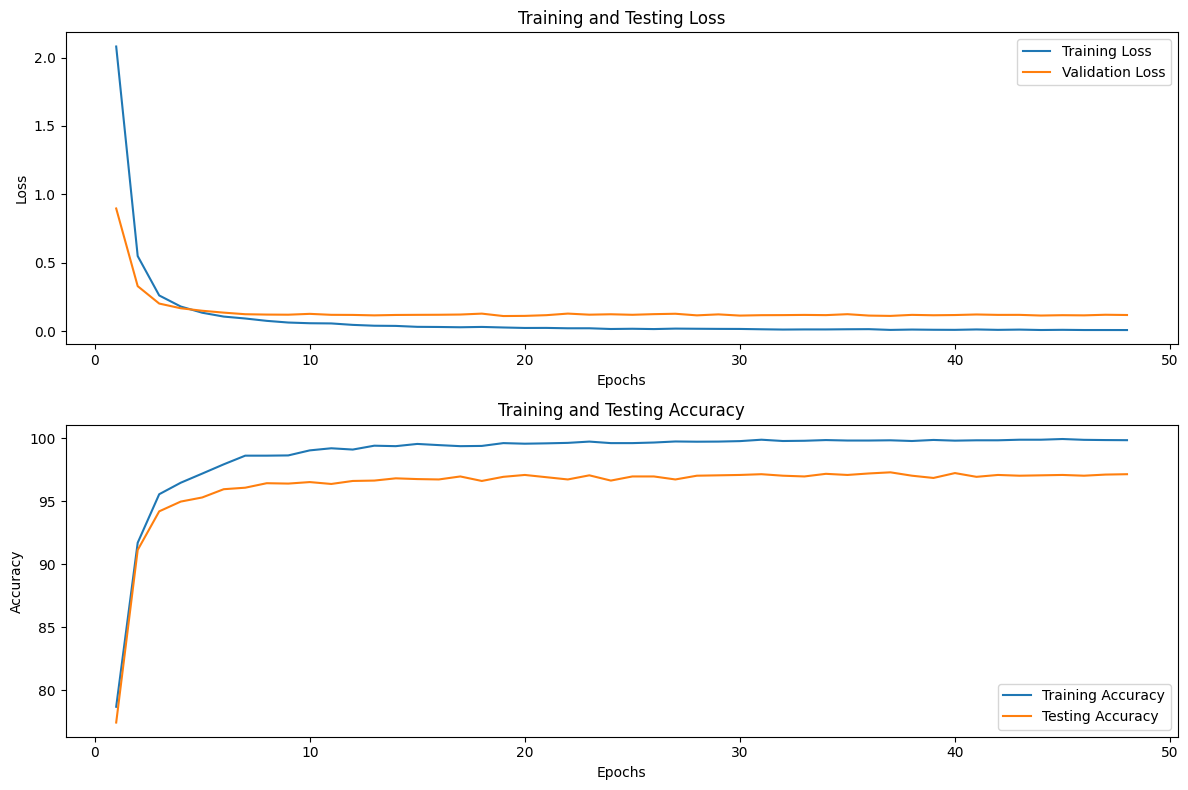

In [36]:
Trainer.plot_learning_curves(resnet_trainer)